In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import TweedieRegressor

In [6]:
df = pd.read_csv('full_df',index_col=[0])

In [7]:
df

,0,team,1,2,3_x,4,5,6,7,8_x,...,15,year,first_round,divisional_round,conference_championship,superbowl,won_superbowl,full_name,3_y,8_y
3,Aaron Rodgers,GB,2.87,6.3,9.2,-3.0,16.4,60.8,0.8,610.0,...,3.5,2016,1.0,1.0,1.0,0.0,0.0,Aaron Rodgers,2013,17.9%
71,Aaron Rodgers,GB,2.65,5.0,7.0,-1.9,14.7,48.3,-1.4,238.0,...,-2.2,2017,0.0,0.0,0.0,0.0,0.0,Aaron Rodgers,2013,17.9%
87,Aaron Rodgers,GB,2.95,6.0,8.8,-2.8,13.7,61.4,-0.2,597.0,...,-1.1,2018,0.0,0.0,0.0,0.0,0.0,Aaron Rodgers,2018,18.9%
133,Aaron Rodgers,GB,2.88,5.4,8.9,-3.6,14.2,54.9,0.1,569.0,...,-1.7,2019,0.0,1.0,1.0,0.0,0.0,Aaron Rodgers,2018,18.9%
170,Aaron Rodgers,GB,2.72,5.5,8.1,-2.6,11.2,60.3,-0.4,526.0,...,4.4,2020,0.0,1.0,1.0,0.0,0.0,Aaron Rodgers,2018,18.9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24,Tyrod Taylor,BUF,3.13,7.2,9.9,-2.7,14.2,61.1,0.8,436.0,...,1.3,2016,0.0,0.0,0.0,0.0,0.0,Tyrod Taylor,2016,11.6%
64,Tyrod Taylor,BUF,3.02,5.5,8.3,-2.7,15.2,51.7,-1.1,420.0,...,-3.1,2017,1.0,0.0,0.0,0.0,0.0,Tyrod Taylor,2017,9.1%
244,Tyrod Taylor,HOU,2.78,5.2,7.5,-2.3,17.3,56.4,-0.7,150.0,...,-4.6,2021,0.0,0.0,0.0,0.0,0.0,Tyrod Taylor,2021,3.0%
237,Zach Wilson,NYJ,3.00,5.8,7.7,-1.9,12.8,56.8,-1.5,383.0,...,-10.3,2021,0.0,0.0,0.0,0.0,0.0,Zach Wilson,2021,4.8%


In [54]:
def univariate_visual(df):
    '''
    creates histplots for all of my columns
    '''
    plt.figure(figsize=(25,15))
    plt.xticks(rotation = 45)
    for i, col in enumerate(df):

        plt.title(col)
        sns.histplot(df[col])
        plt.xticks(rotation=45)
        plt.show()
        
    plt.show()

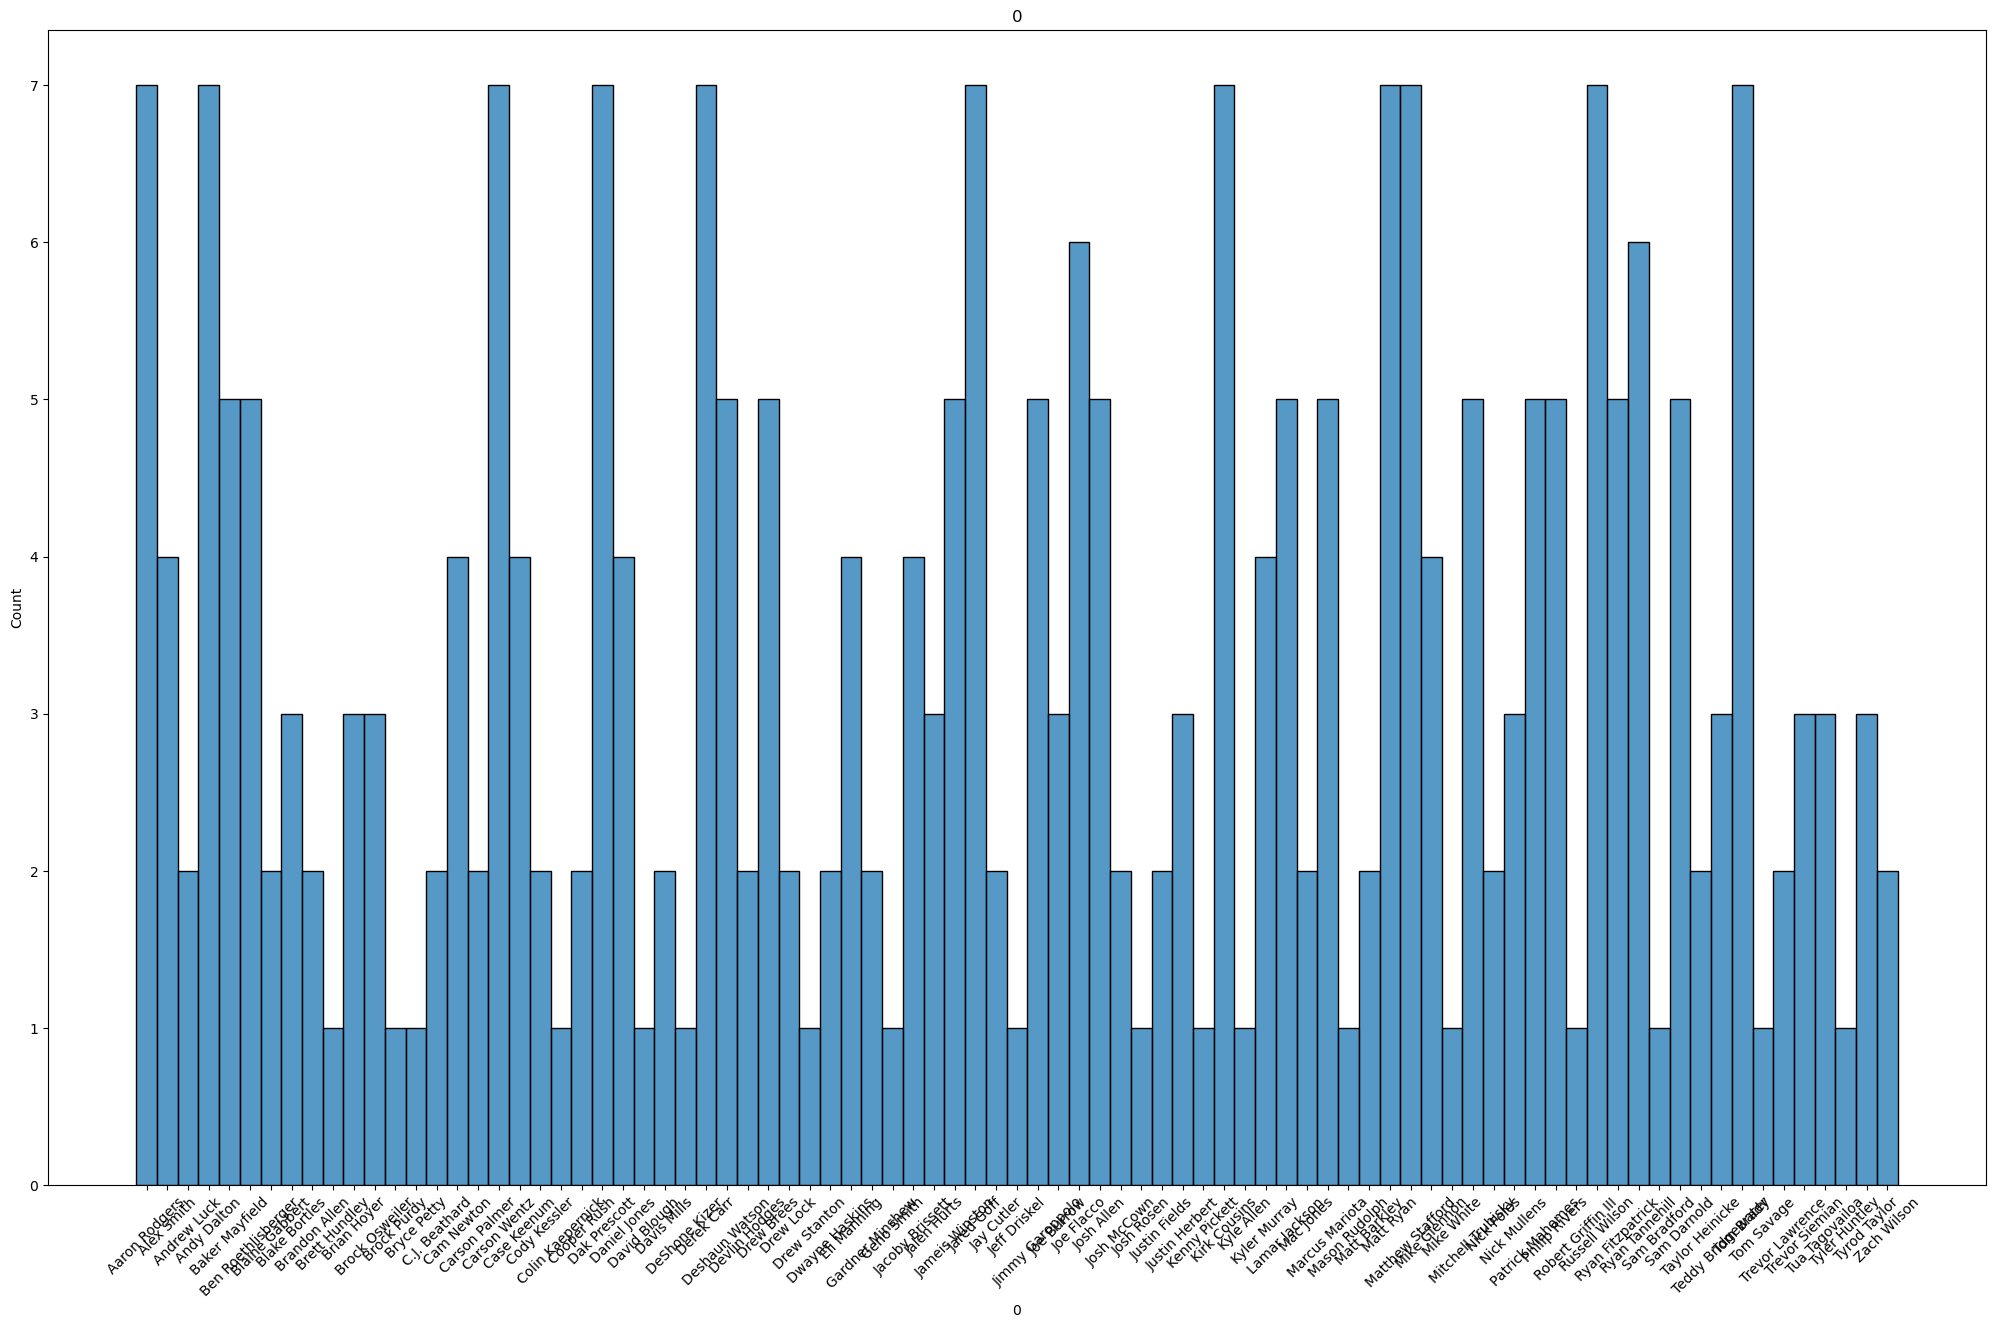

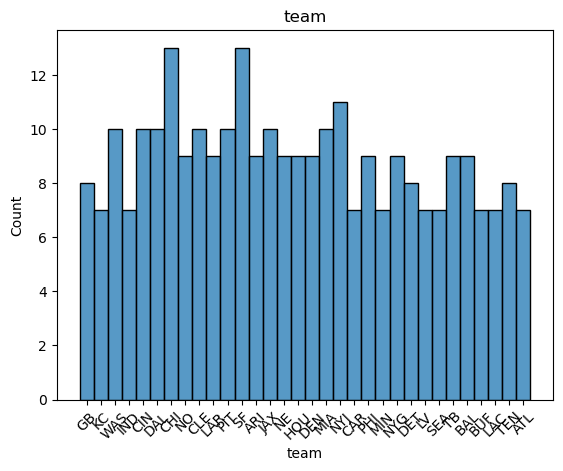

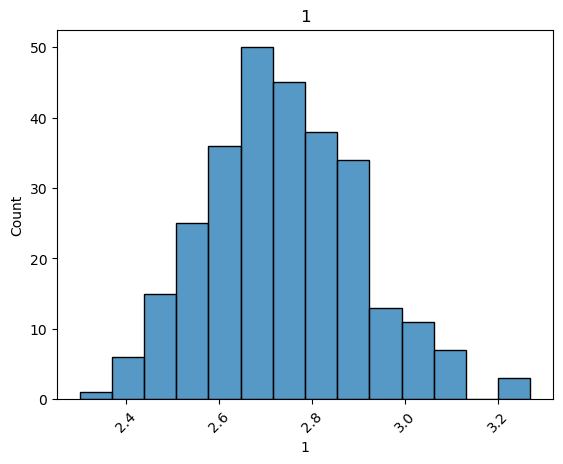

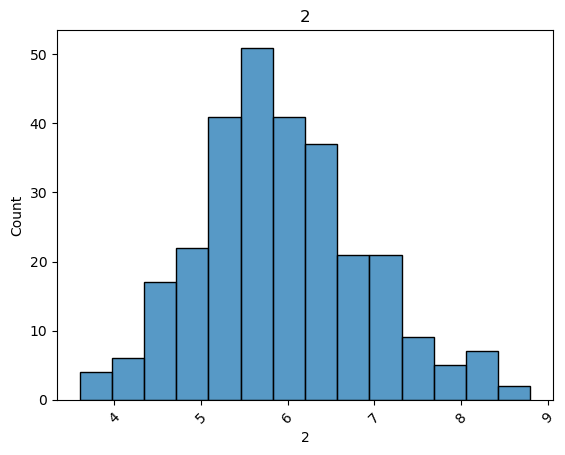

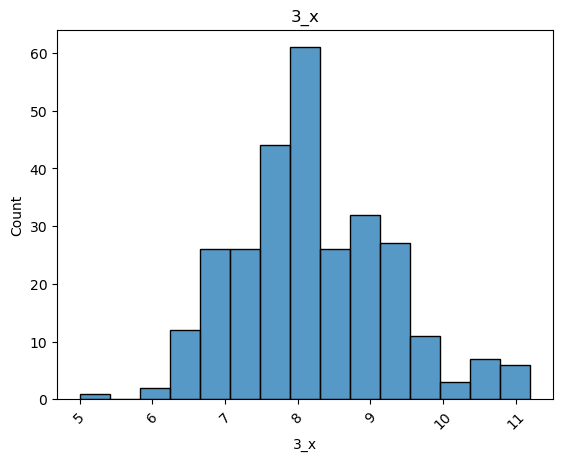

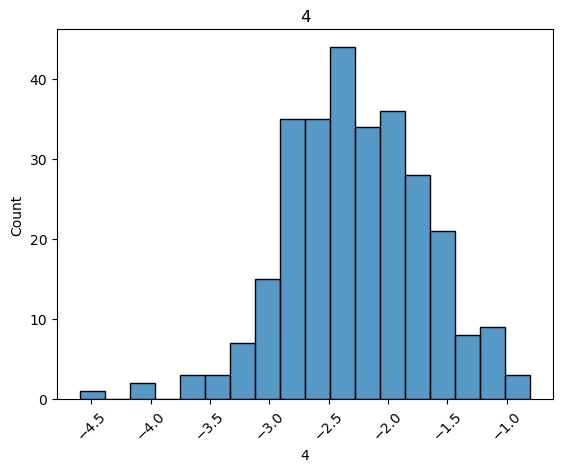

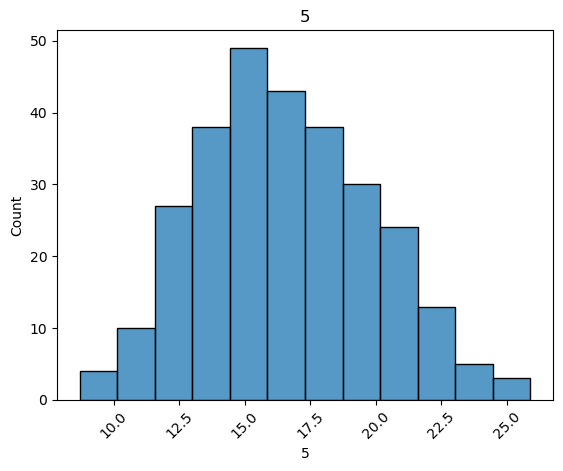

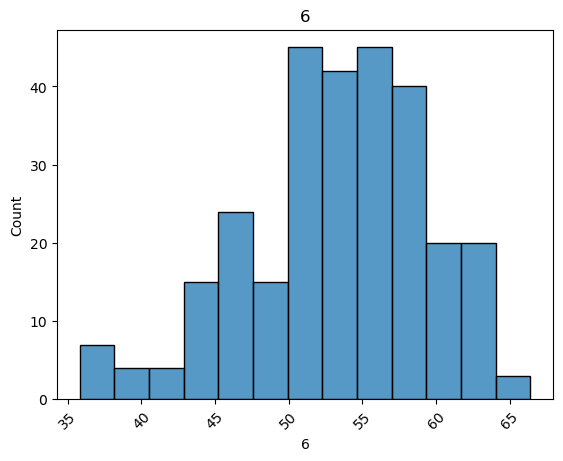

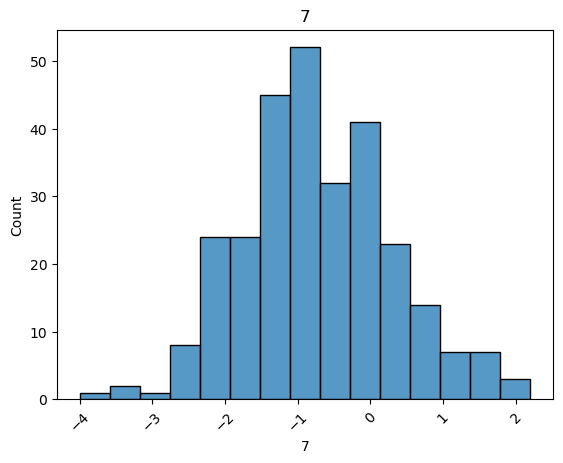

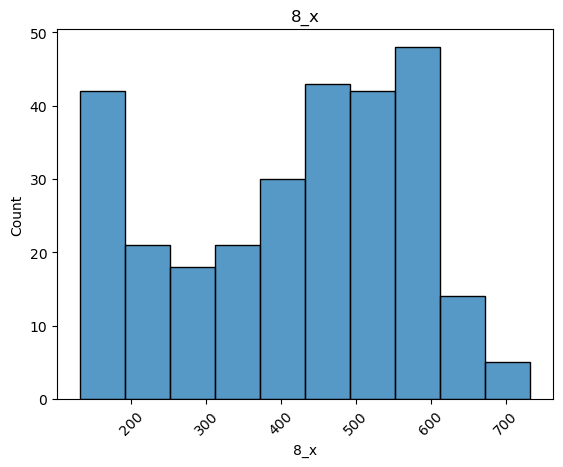

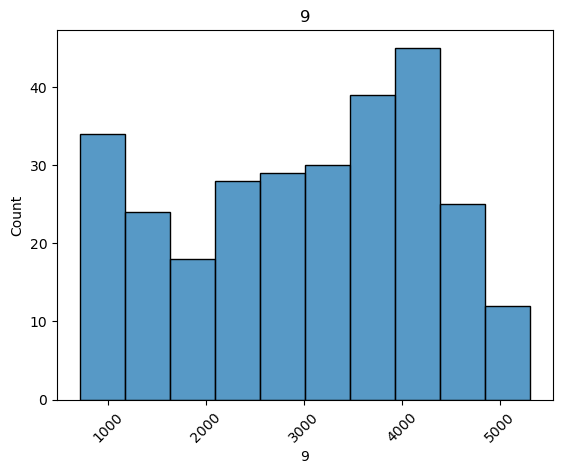

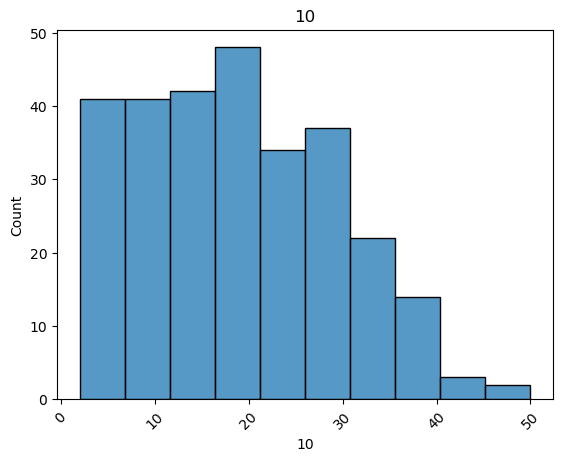

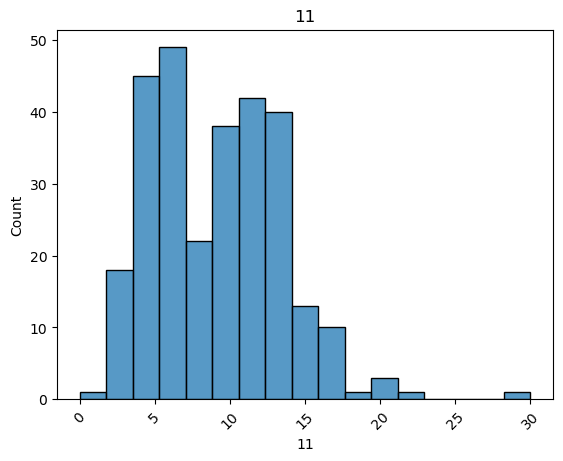

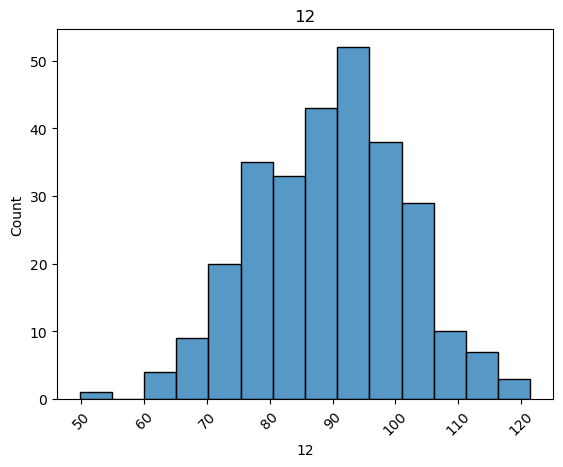

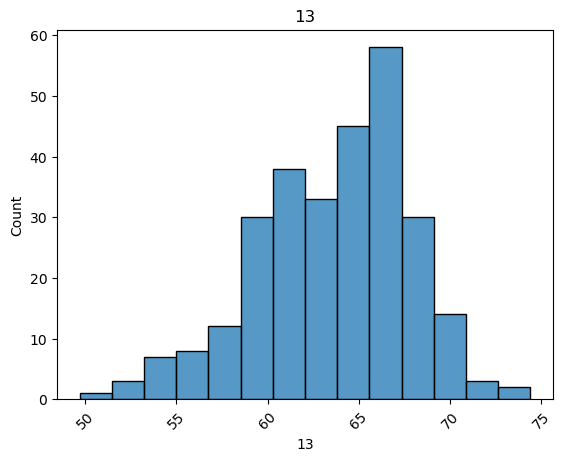

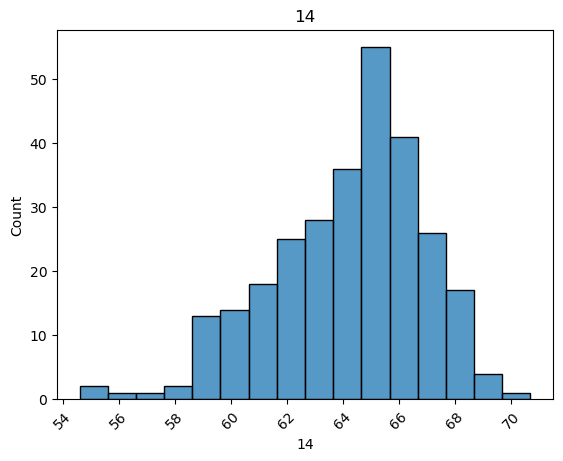

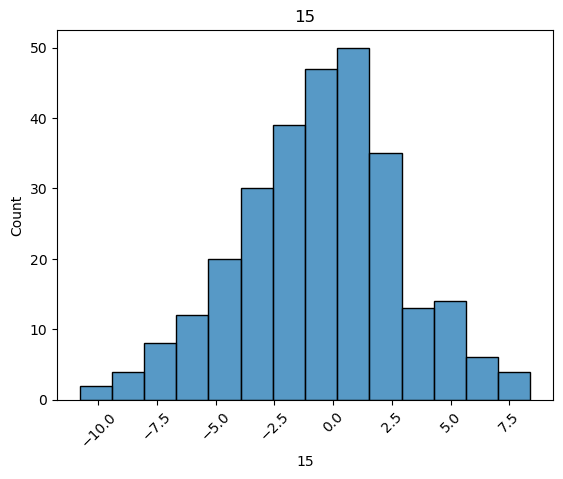

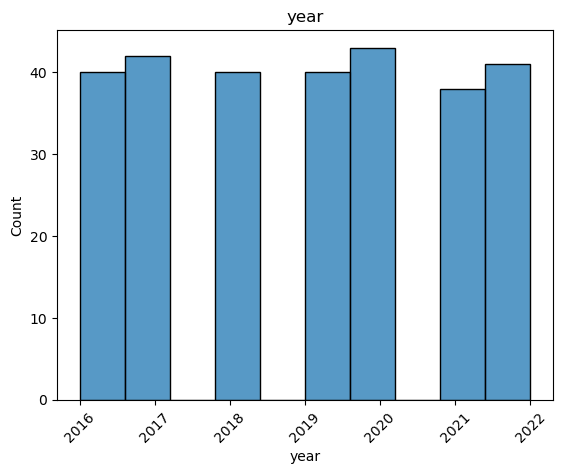

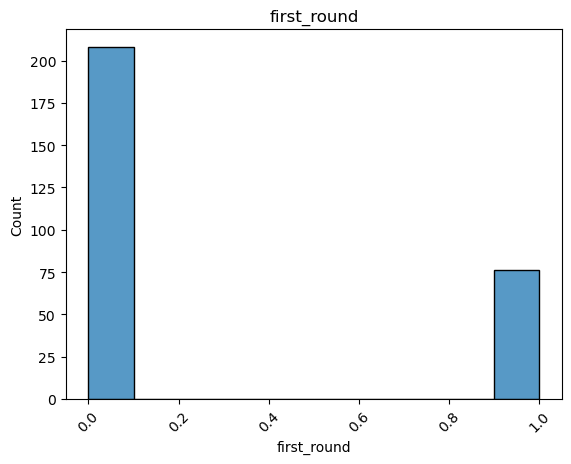

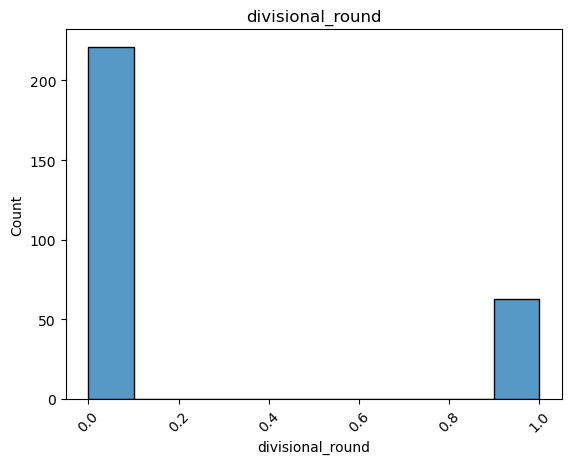

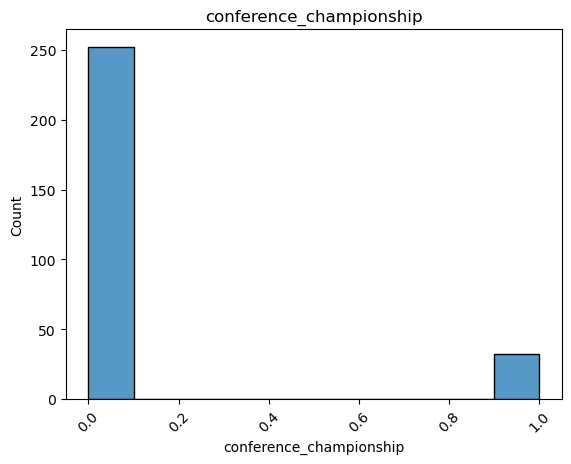

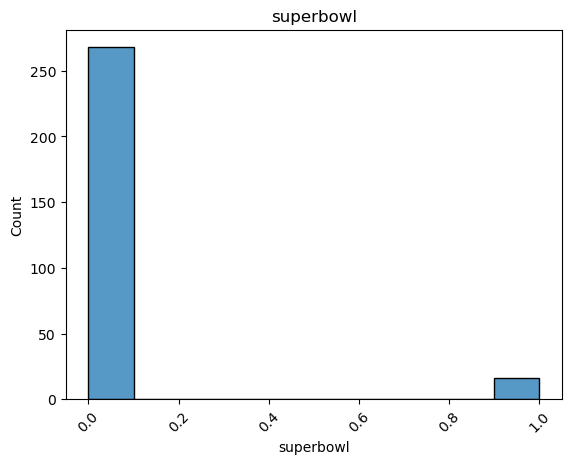

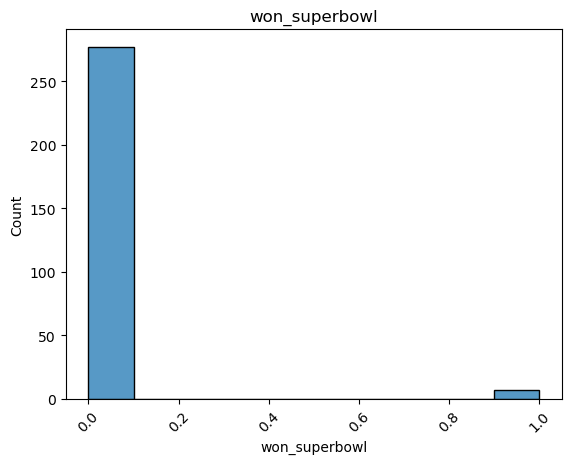

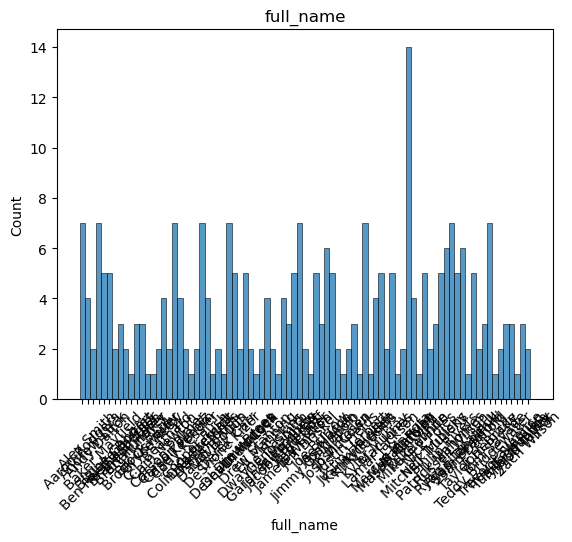

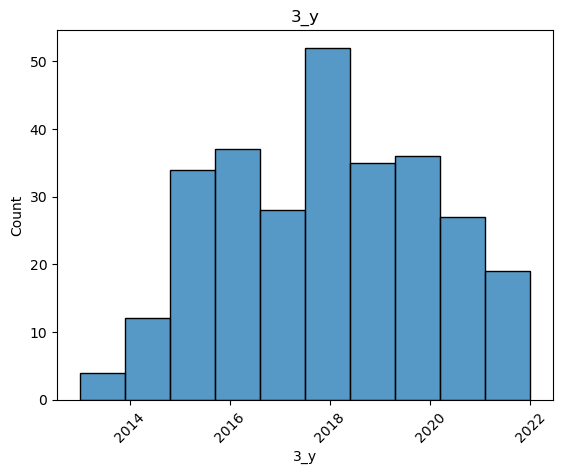

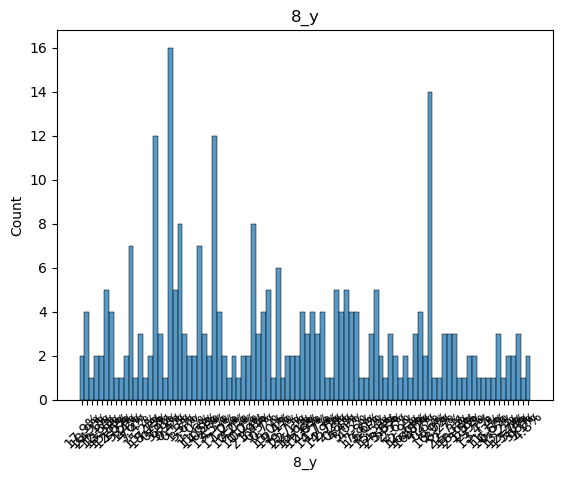

In [55]:
univariate_visual(df)

In [94]:
def correlation_charts(train,columns_list, target):
    '''
    Creates and shows visuals for Correlation tests 
    '''
    plt.figure(figsize=(14,3))
    plt.suptitle('Bivariate Exploration: The Strongest Correlators of Wine Quality')
    for i, col in enumerate(train[columns_list]):
        if col != target:

            sns.regplot(data = train, x = col, y = target, scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})

            plt.show()

In [70]:
df['8_y'] = df['8_y'].str.replace('%', '')

In [77]:
df['8_y'] = df['8_y'].astype(float)

In [78]:
columns_list = df.select_dtypes(exclude=['object']).columns.to_list()

In [81]:
target = columns_list.pop(len(columns_list) -1 )

In [82]:
target

'8_y'

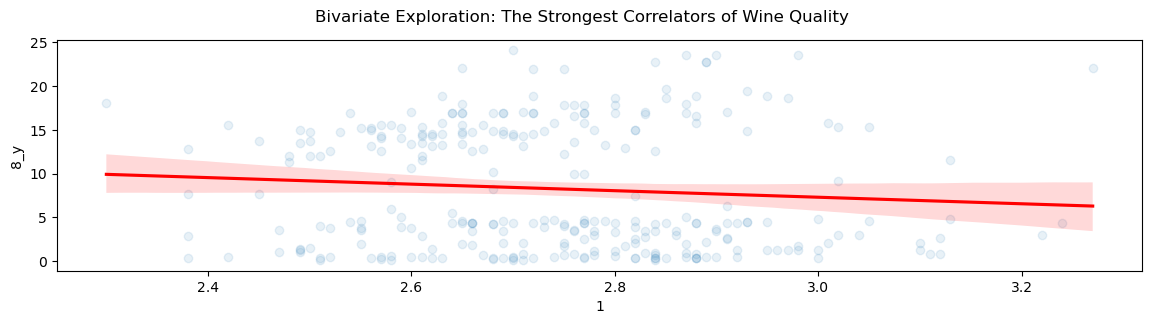

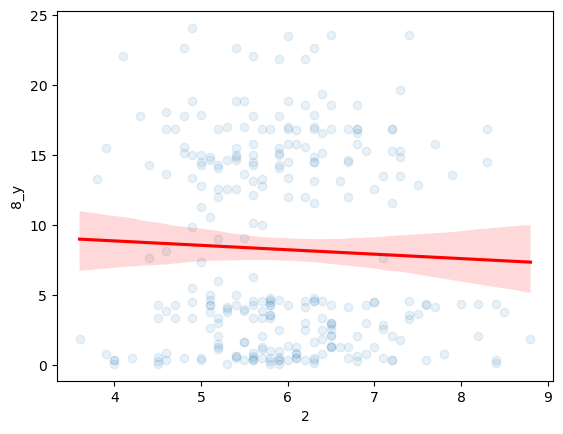

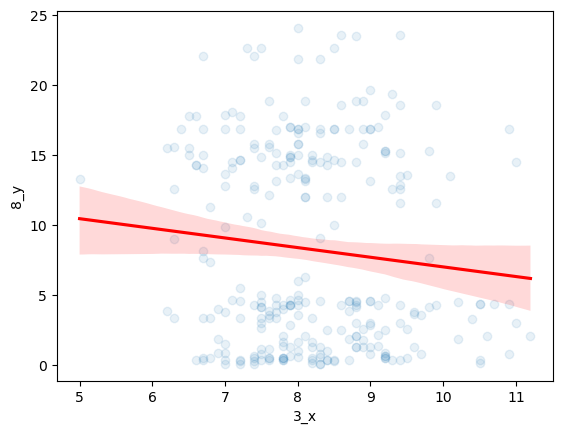

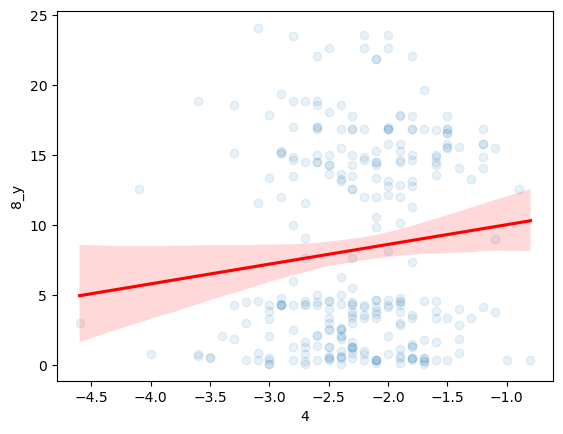

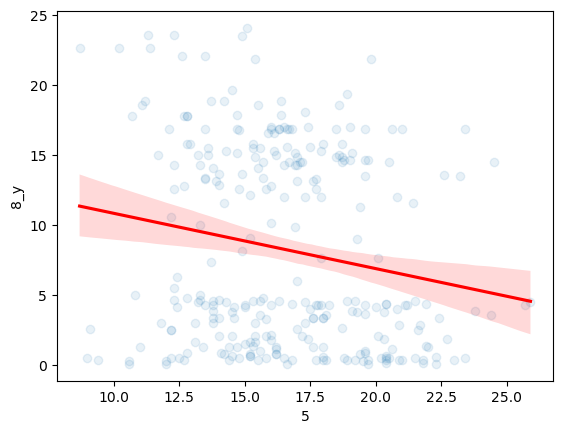

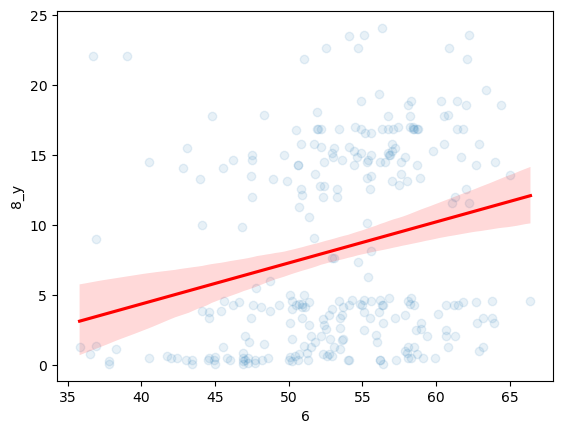

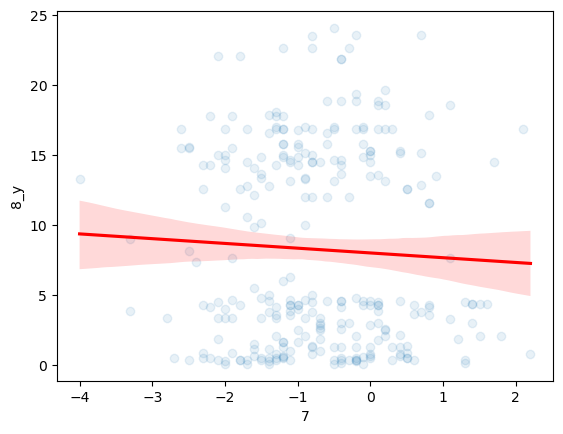

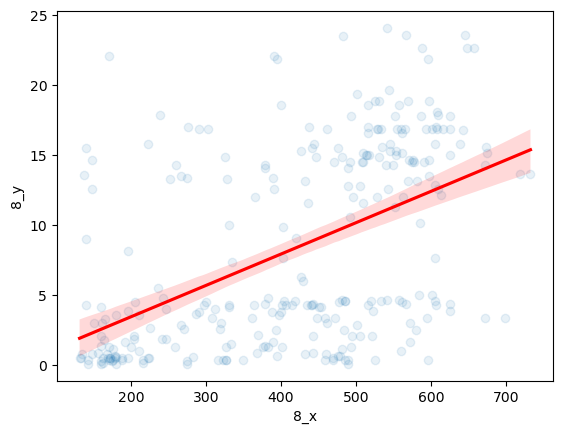

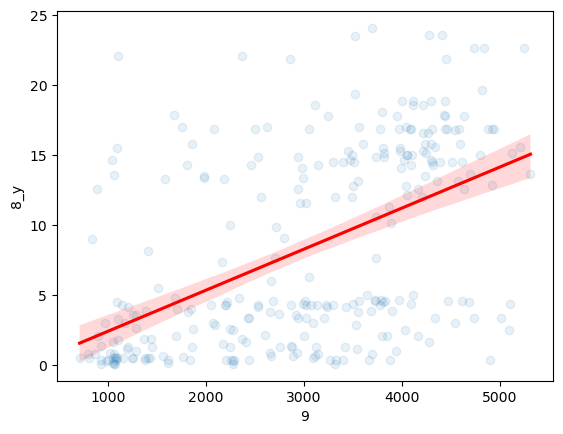

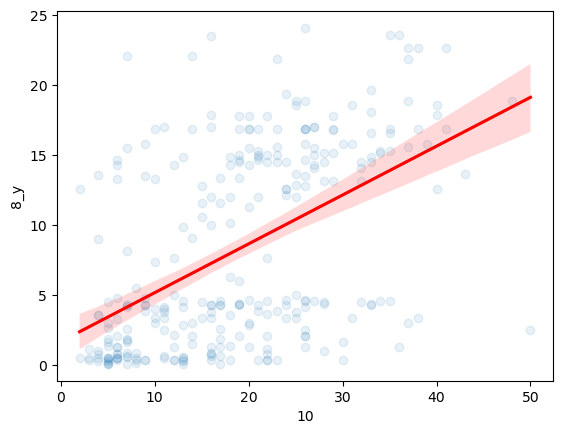

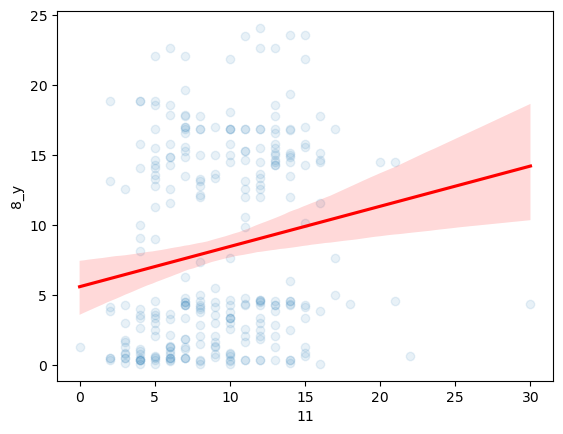

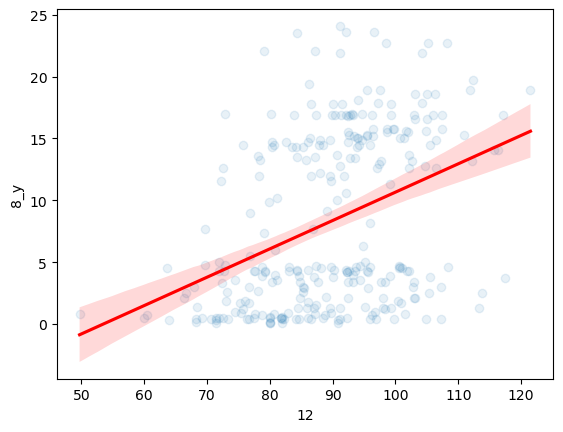

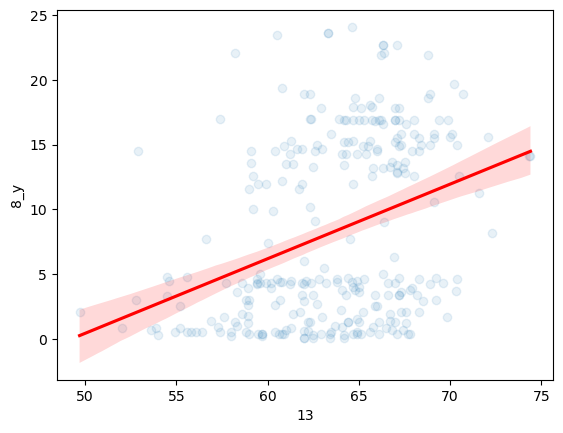

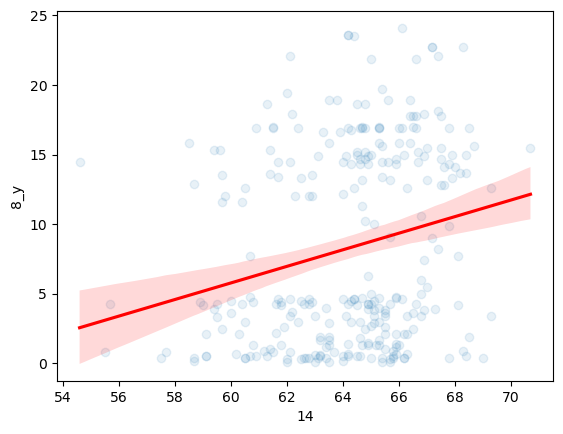

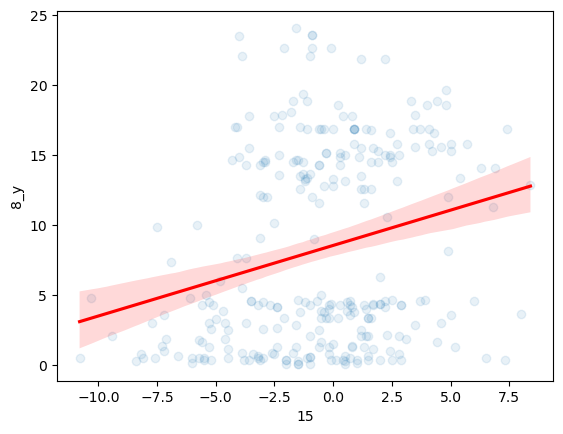

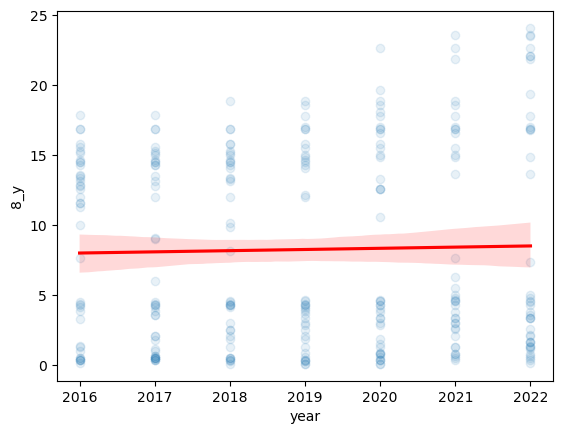

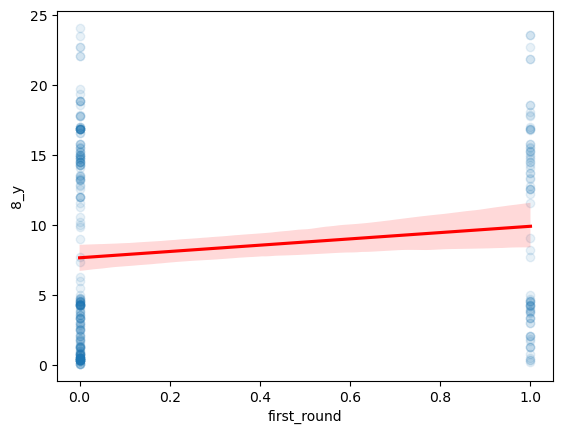

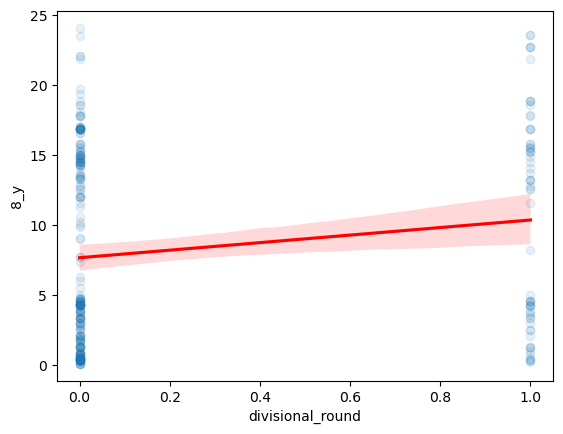

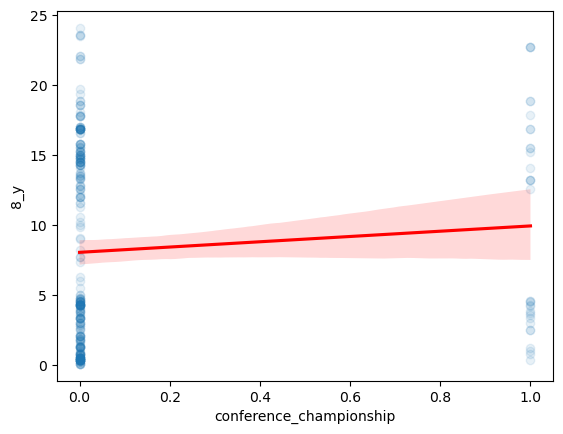

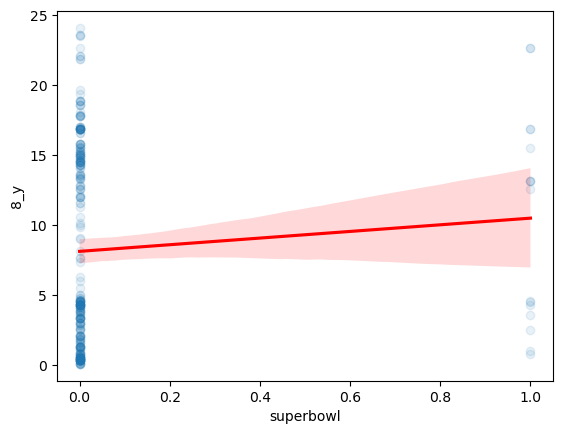

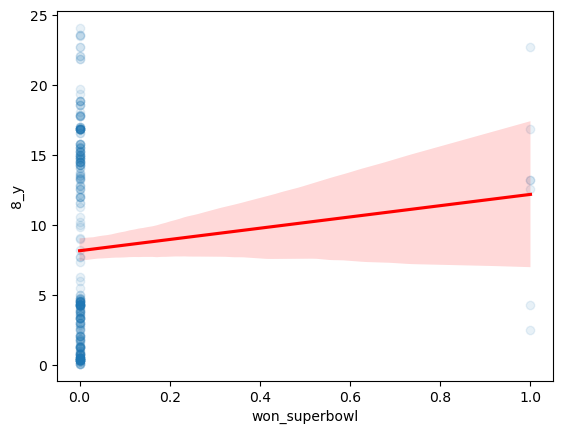

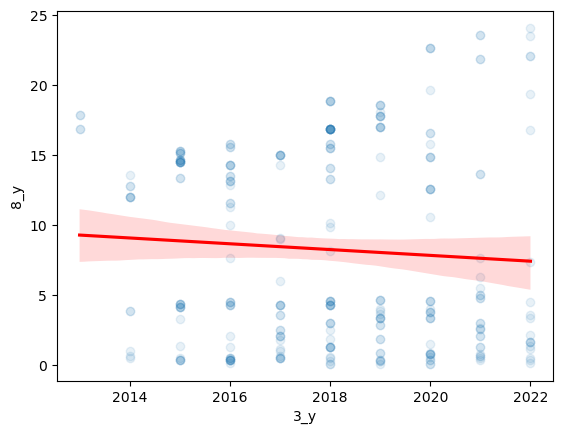

In [95]:
correlation_charts(df,columns_list, target)

In [ ]:
def correlation_tests(train):
    '''
    Runs a correlation test on dataframe features vs target variable
    '''
    corr_df = pd.DataFrame({'feature': [],
                        'r': [],
                       'p': []})
    for i, col in enumerate(train.drop(columns='wine_type')):
        r, p = stats.pearsonr(train[col], train['quality'])
        corr_df.loc[i] = [col, abs(r), p]

    return corr_df.sort_values(by='r', ascending=False)
